In [1]:
import os
from typing import Any, Optional, Union
import matplotlib
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import bar
import matplotlib.pyplot as plt


Kwargs = dict[str, Any]
MetricType = Union[bool, Kwargs]


_METRIC_TYPE = "Metric Type"
_AGGREGATE_SCORE = "Macro F1"




def plot_results_table(df, show: bool = True, save_path: Optional[str] = None
    ) -> Table:
        """Plot the benchmarking results.

        Parameters
        ----------
        min_max_scale
            Whether to min max scale the results.
        show
            Whether to show the plot.
        save_dir
            The directory to save the plot to. If `None`, the plot is not saved.
        """
        
        
        # Do not want to plot what kind of metric it is
        plot_df = df.drop(_METRIC_TYPE, axis=0)
        num_embeds = plot_df.shape[0]
        # Sort by total score
        # plot_df = plot_df.sort_values(by=_AGGREGATE_SCORE, ascending=False).astype(np.float64)
        plot_df["Dataset"] = plot_df.index

        # Split columns by metric type, using df as it doesn't have the new method col
        score_cols = df.columns[df.loc[_METRIC_TYPE] == _AGGREGATE_SCORE]
        other_cols = df.columns[df.loc[_METRIC_TYPE] != _AGGREGATE_SCORE]
        column_definitions = [
            ColumnDefinition("Dataset", width=1.5, textprops={"ha": "left", "weight": "bold"}),
        ]

        column_definitions += [
            ColumnDefinition(
                col,
                title=col.split('.')[0],
                width=1,
                textprops={
                    "ha": "center",
                    "bbox": {"boxstyle": "circle", "pad": 0.25},
                },
                cmap=matplotlib.cm.PRGn,
                group=df.loc[_METRIC_TYPE, col],
                formatter="{:.2f}",
            )
            for i, col in enumerate(other_cols)
        ]
        # Bars for the aggregate scores
        column_definitions += [
            ColumnDefinition(
                col,
                width=1,
                title=col.split('.')[0],
                plot_fn=bar,
                plot_kw={
                    "cmap": matplotlib.cm.YlGnBu,
                    "plot_bg_bar": False,
                    "annotate": True,
                    "height": 0.9,
                    "formatter": "{:.2f}",
                },
                group=df.loc[_METRIC_TYPE, col],
                border="left" if i == 0 else None,
            )
            for i, col in enumerate(score_cols)
        ]
        # Allow to manipulate text post-hoc (in illustrator)
        with matplotlib.rc_context({"svg.fonttype": "none"}):
            fig, ax = plt.subplots(figsize=(len(df.columns) * 1.3, 3 + 0.35 * num_embeds))
            ax.patch.set_facecolor("white")
            tab = Table(
                plot_df,
                cell_kw={
                    "linewidth": 0,
                    "edgecolor": "k",
                },
                column_definitions=column_definitions,
                ax=ax,
                row_dividers=True,
                footer_divider=True,
                textprops={"fontsize": 10, "ha": "center"},
                row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
                col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
                column_border_kw={"linewidth": 1, "linestyle": "-"},
                index_col="Dataset",
            ).autoset_fontcolors(colnames=plot_df.columns)
        if show:
            plt.show()
        if save_path is not None:
            fig.savefig(save_path, facecolor=ax.get_facecolor(), dpi=300)

        return tab

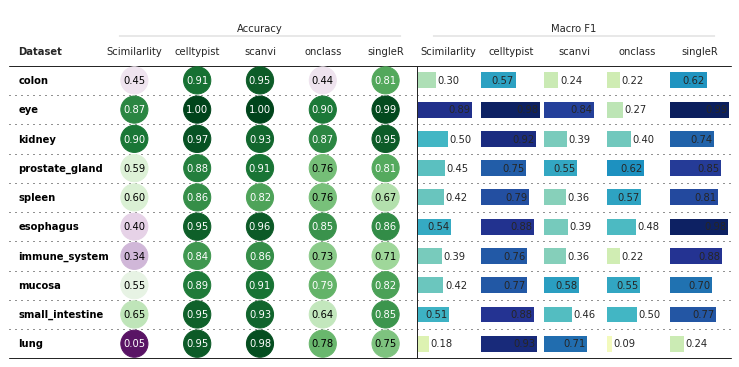

In [100]:
import pandas as pd

df = pd.read_excel('./figs_data.xlsx', sheet_name='fig4a-1')
df = df.set_index("dataset")
plot_results_table(df, save_path='./fig4_annotation_scores_other_model.svg')

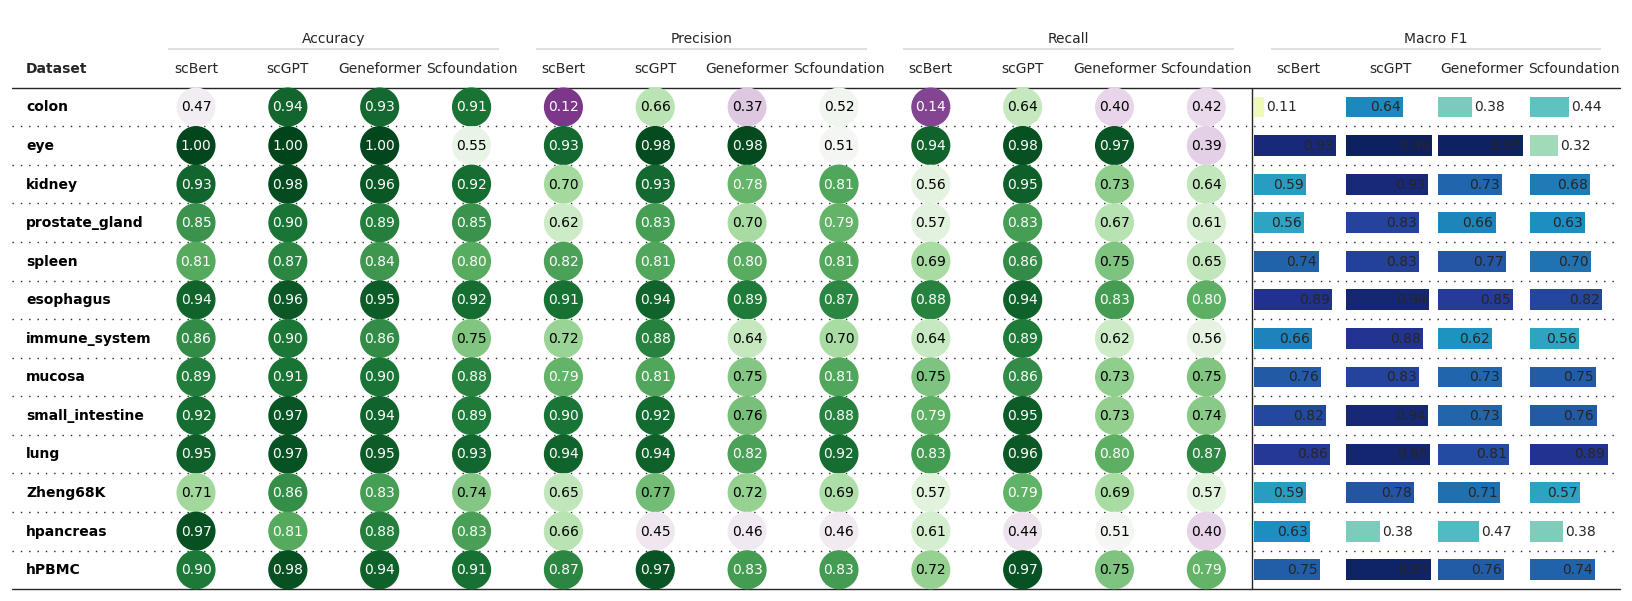

In [3]:
import pandas as pd

df = pd.read_excel('./figs_data.xlsx', sheet_name='fig4a')
df = df.set_index("dataset")
plot_results_table(df, save_path='./fig6_annotation_scores.svg')

In [1]:
from collections import defaultdict
import pandas as pd

df = pd.read_excel('./figs_data.xlsx', sheet_name='fig4b')
plot_dict = defaultdict(list)
for i in range(df.shape[0]):
    for model in ['scBert', 'scGPT', 'Scfoundation', 'Geneformer']:
        plot_dict['Name'].append(model)
        plot_dict['cell_num'].append(int(df['cell'][i] /10000))
        plot_dict['Runtime'].append(df[model][i]/60)
df = pd.DataFrame(plot_dict)
df.dropna(inplace=True)
df = df.groupby(by=['cell_num', 'Name']).mean()
df = df.reset_index()
df

,cell_num,Name,Runtime
0,3,Geneformer,27.037500
1,3,Scfoundation,134.000000
2,3,scBert,180.083333
3,3,scGPT,40.891667
4,4,Geneformer,21.416667
5,4,Scfoundation,62.000000
6,4,scBert,251.200000
7,4,scGPT,45.850000
8,8,Geneformer,55.722222
9,8,Scfoundation,171.333333


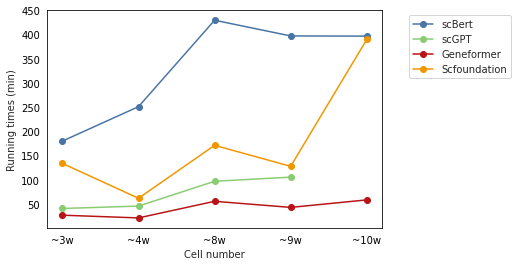

In [7]:
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(5, 3))
# plt.grid(False)
axes_1 = plt.gca()
color_name = "black"
axes_1.spines["top"].set_color(color_name)
axes_1.spines["bottom"].set_color(color_name)
axes_1.spines["left"].set_color(color_name)
axes_1.spines["right"].set_color(color_name)
axes_1.patch.set_facecolor("white")
axes_1.axes.xaxis.set_visible(True)
plt.tick_params(axis='x', colors=color_name)
plt.tick_params(axis='y', colors=color_name)

tmp_df = df[df['Name'] == 'scBert'].sort_values(by='cell_num')
axes_1.plot('~' + tmp_df['cell_num'].astype(str) + 'w', tmp_df['Runtime'], marker='o', color="#4974a4")
tmp_df = df[df['Name'] == 'scGPT'].sort_values(by='cell_num')
axes_1.plot('~' + tmp_df['cell_num'].astype(str) + 'w', tmp_df['Runtime'], marker='o', color="#8acc72")
tmp_df = df[df['Name'] == 'Geneformer'].sort_values(by='cell_num')
axes_1.plot('~' + tmp_df['cell_num'].astype(str) + 'w', tmp_df['Runtime'], marker='o', color="#b81316")
tmp_df = df[df['Name'] == 'Scfoundation'].sort_values(by='cell_num')
axes_1.plot('~' + tmp_df['cell_num'].astype(str) + 'w', tmp_df['Runtime'], marker='o', color="#f29600")
plt.xticks('~' + tmp_df['cell_num'].astype(str) + 'w')
axes_1.set_ylabel('Running times (min)')
axes_1.set_xlabel('Cell number')
plt.legend(['scBert', 'scGPT', 'Geneformer', 'Scfoundation'], loc=1, bbox_to_anchor=(1.4, 1), facecolor='white')
plt.savefig('./fig4b_runtime.pdf', bbox_inches='tight')

# cell embedding umap

# intra dataset: zheng68k

In [149]:
import os
import pickle
import scanpy as sc


models = ['PCA', 'scgpt', 'geneformer', 'scbert', 'scf']
path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/zheng68k/test.h5ad'
output_dir = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/cell_emb/zheng68k/'
pkl_map = {'scBert': 'scbert_cell_emb.pkl', 'scGPT': 'scg_cell_emb.pkl', 'scFoundation': 'scf_cell_emb.pkl', 'Geneformer': 'gf_cell_emb.pkl'}


adata = sc.read_h5ad(path)

sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, subset=True, n_top_genes=1200)
sc.tl.pca(adata)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)
sc.tl.tsne(adata)

for model in models:
    if model !=  'PCA':
        path = f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/{i}/' if model != 'scf' else f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/hvg/{i}/'
        predict_label = pickle.load(open(path + 'predict_list.pk', 'rb'))
        adata.obs[model + '_predict_label'] = predict_label    




In [154]:
adata

AnnData object with n_obs × n_vars = 6595 × 1200
    obs: 'celltype', 'scgpt_predict_label', 'geneformer_predict_label', 'scbert_predict_label', 'scf_predict_label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

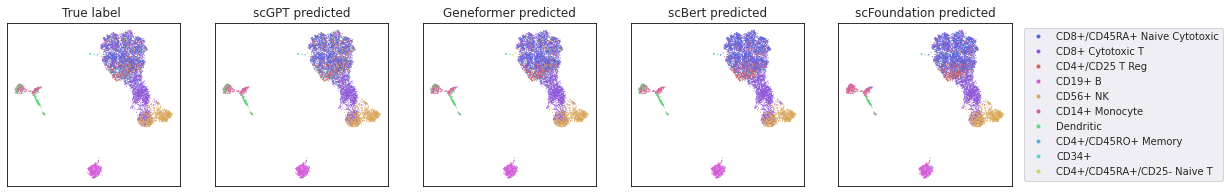

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


labels = set(np.unique(adata.obs['celltype']))
for model in models[1::]:
    label_key = model + '_predict_label'
    labels = labels.union(set(adata.obs[label_key]))
labels = list(labels)
colors = sns.color_palette('hls', len(labels)).as_hex()
color_dict = {labels[i]: colors[i] for i in range(len(labels))}
# models = ['PCA', 'Geneformer', 'scGPT', 'scFoundation']
models = ['PCA', 'scgpt', 'geneformer', 'scbert', 'scf']
models_name = {'PCA': 'True label ', 'scbert': 'scBert predicted', 'geneformer': 'Geneformer predicted', 'scgpt': 'scGPT predicted', 'scf': 'scFoundation predicted'}
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3), gridspec_kw={"wspace": 0.2})


axes = [ax1, ax2, ax3, ax4, ax5]  # Collect all axes in a list
for j in range(5):
    ax = axes[j]  # Access the correct ax from the axes list
    label_key = 'celltype' if models[j] == 'PCA'  else models[j] + '_predict_label'
    color_name = "black"
    ax.spines["top"].set_color(color_name)
    ax.spines["bottom"].set_color(color_name)
    ax.spines["left"].set_color(color_name)
    ax.spines["right"].set_color(color_name)
    ax.patch.set_facecolor("white")
    ax.axes.xaxis.set_visible(True)
    if j < 4:
        g = sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1], hue=adata.obs[label_key], palette=color_dict, s=1, ax=ax, legend=False, linewidth=0) 
       # plt.legend([],[], frameon=False)
    else:
        g = sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1], hue=adata.obs[label_key], palette=color_dict, s=1, ax=ax, legend=True, linewidth=0)
        g.legend(loc=1, bbox_to_anchor=(2.25, 1), markerscale=4)
    g.set(xticklabels=[])  
    g.set(yticklabels=[])  
    g.set(title=models_name[models[j]])
    g.set(xlabel=None)
    g.set(ylabel=None)
    g.tick_params(bottom=False)
    # plt.legend(loc=1, bbox_to_anchor=(1.8, 1), markerscale=4, ax=ax)
# # Display the plot
plt.savefig(f"./fig6_anno_zheng68k_umap.pdf", bbox_inches='tight')
# plt.show()

In [105]:
adata = sc.read_h5ad('/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/zheng68k/test.h5ad')

sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, subset=True, n_top_genes=1200)
sc.tl.pca(adata)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)
sc.tl.tsne(adata)

## inter dataset: hpancreas

In [52]:
import scanpy as sc

adata = sc.read_h5ad('/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/hPBMC_intra/test.h5ad')
adata.X.max()

7.7237115

In [57]:
adata

AnnData object with n_obs × n_vars = 7378 × 1200
    obs: 'Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method', 'CellType', 'cell_type_ontology_term_id', 'scgpt_predict_label', 'geneformer_predict_label', 'scbert_predict_label', 'scf_predict_label'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'hvg', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [54]:
import os
import pickle
import scanpy as sc


models = ['PCA', 'scgpt', 'geneformer', 'scbert', 'scf']
path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/hPBMC_intra/test.h5ad'



adata = sc.read_h5ad(path)

# organs = "hpancreas_intra,hPBMC_intra"
sc.pp.highly_variable_genes(adata, subset=True, n_top_genes=1200)
sc.tl.pca(adata)
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.umap(adata)
sc.tl.tsne(adata)

for model in models:
    if model !=  'PCA':
        path = f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/hPBMC_intra/' if model != 'scf' else f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/all_genes/hPBMC_intra/'
        if model in ['scbert']:
            predict_label = pickle.load(open(path + 'predict_list.pk.best_model.pt', 'rb')) 
        elif model == 'scgpt':
            predict_label = pickle.load(open(path + 'predict_list.pk.anno_scgpt_best_model.pt', 'rb')) 
        elif model == 'scf':
            predict_label = pickle.load(open(path + 'predict_list.pk.model_best.pt', 'rb')) 
        else:
            predict_label = pickle.load(open(path + 'predict_list.pk', 'rb'))
        adata.obs[model + '_predict_label'] = predict_label    

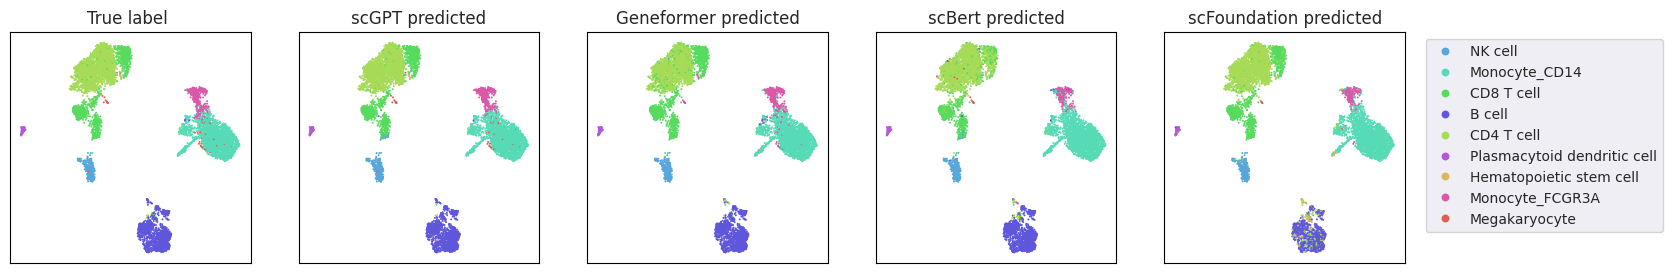

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


labels = set(np.unique(adata.obs['CellType']))
for model in models[1::]:
    label_key = model + '_predict_label'
    labels = labels.union(set(adata.obs[label_key]))
labels = list(labels)
colors = sns.color_palette('hls', len(labels)).as_hex()
color_dict = {labels[i]: colors[i] for i in range(len(labels))}
# models = ['PCA', 'Geneformer', 'scGPT', 'scFoundation']
models = ['PCA', 'scgpt', 'geneformer', 'scbert', 'scf']
models_name = {'PCA': 'True label ', 'scbert': 'scBert predicted', 'geneformer': 'Geneformer predicted', 'scgpt': 'scGPT predicted', 'scf': 'scFoundation predicted'}
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3), gridspec_kw={"wspace": 0.2})


axes = [ax1, ax2, ax3, ax4, ax5]  # Collect all axes in a list
for j in range(5):
    ax = axes[j]  # Access the correct ax from the axes list
    label_key = 'CellType' if models[j] == 'PCA'  else models[j] + '_predict_label'
    color_name = "black"
    ax.spines["top"].set_color(color_name)
    ax.spines["bottom"].set_color(color_name)
    ax.spines["left"].set_color(color_name)
    ax.spines["right"].set_color(color_name)
    ax.patch.set_facecolor("white")
    ax.axes.xaxis.set_visible(True)
    if j < 4:
        g = sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1], hue=adata.obs[label_key], palette=color_dict, s=2, ax=ax, legend=False, linewidth=0) 
       # plt.legend([],[], frameon=False)
    else:
        g = sns.scatterplot(x=adata.obsm['X_umap'][:, 0], y=adata.obsm['X_umap'][:, 1], hue=adata.obs[label_key], palette=color_dict, s=2, ax=ax, legend=True, linewidth=0)
        g.legend(loc=1, bbox_to_anchor=(2.1, 1), markerscale=4)
    g.set(xticklabels=[])  
    g.set(yticklabels=[])  
    g.set(title=models_name[models[j]])
    g.set(xlabel=None)
    g.set(ylabel=None)
    g.tick_params(bottom=False)
    # plt.legend(loc=1, bbox_to_anchor=(1.8, 1), markerscale=4, ax=ax)
# # Display the plot
plt.savefig(f"./fig6_anno_hPBMC_intra_umap.pdf", bbox_inches='tight')
# plt.show()

# confusion_matrix

In [63]:

import scanpy as sc
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
organs = "hPBMC_intra"
result = []
model_name = []
models = ['scgpt', 'geneformer', 'scbert', 'scf']
for i in organs.split(','):
    # for model in {'scbert': 'scBert', 'scgpt': 'scGPT', 'geneformer':'Geneformer'}:
    adata = sc.read_h5ad(f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/{i}/test.h5ad')
    labels = adata.obs['celltype'].values if 'celltype' in adata.obs_keys() else adata.obs['CellType'].values
    label_dict = np.unique(labels)
    
    for model in models:
        
        path = f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/{i}/' if model != 'scf' else f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/all_genes/{i}/'
        if model in ['scbert']:
            predict_label = pickle.load(open(path + 'predict_list.pk.best_model.pt', 'rb')) 
        elif model == 'scgpt':
            predict_label = pickle.load(open(path + 'predict_list.pk.anno_scgpt_best_model.pt', 'rb')) 
        elif model == 'scf':
            predict_label = pickle.load(open(path + 'predict_list.pk.model_best.pt', 'rb')) 
        else:
            predict_label = pickle.load(open(path + 'predict_list.pk', 'rb'))
        m = confusion_matrix(labels, predict_label, labels=label_dict)
        score = np.around(m/np.sum(m, axis=1)[:, None], decimals=2)
        score[np.isnan(score)] = 0
        df = pd.DataFrame(score, index=label_dict, columns=label_dict)
        result.append(df)

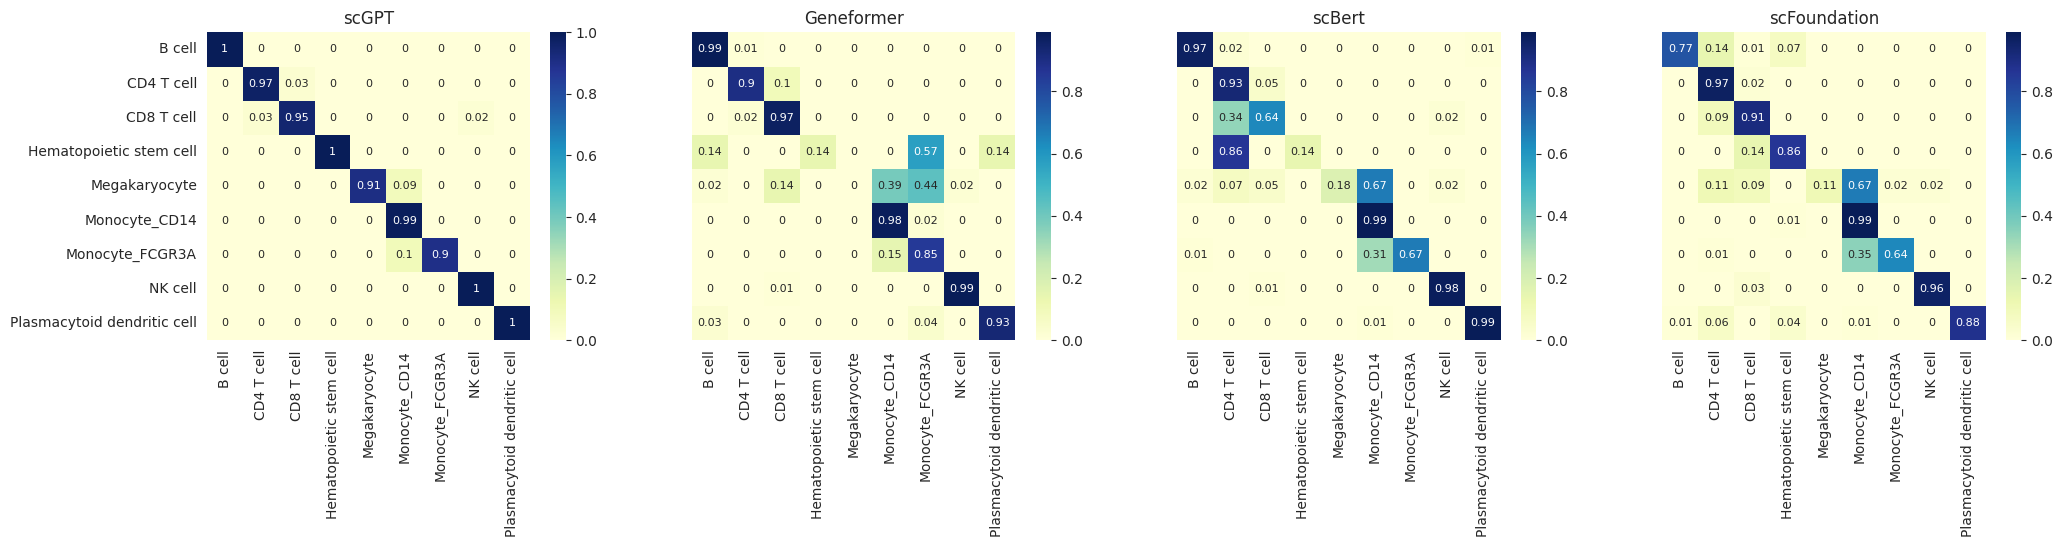

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


models = ['scBert', 'Geneformer', 'scGPT', 'scFoundation']
models = ['scGPT', 'Geneformer', 'scBert', 'scFoundation']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 4), gridspec_kw={"wspace": 0.2})
# adata.obs['batch_str'] = adata.obs['batch'].astype(str)
# label_key = 'batch_str'
axes = [ax1, ax2, ax3, ax4]  # Collect all axes in a list
for j in range(4):
    ax = axes[j]  # Access the correct ax from the axes list
    res = result[j]
    title = models[j]
    cbar = False if j < 3 else True
    g = sns.heatmap(res,annot=True,ax=ax, fmt='g', cmap='YlGnBu', cbar=True, annot_kws={'fontsize': 8})
    if j > 0:
        g.set(yticklabels=[])  
        ax.xaxis.set_ticklabels(res.columns)
        # ax.yaxis.set_ticklabels(res.index)
    else:
        ax.xaxis.set_ticklabels(res.columns)
        ax.yaxis.set_ticklabels(res.index)
    # plt.xticks(rotation=30)
    # g.set(title=models[j])
    # g.set(xlabel=None)
    # g.set(ylabel=None)
    # g.tick_params(bottom=False)
    # sns.heatmap(res,annot=True,ax=ax, fmt='g', cmap='YlGnBu', cbar=True, annot_kws={'fontsize': 8}, xticklabels=False, yticklabels=False)
    # ax.set_ylim()
    # ax.set_xlabel('Predicted labels')
    # ax.set_ylabel('True labels')
    ax.set_title(title)

    

# labels, title and ticks

# Display the plot
plt.savefig(f"./fig6_anno_confusion_matrix_hPBMC.pdf", bbox_inches='tight')
plt.show()

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiup

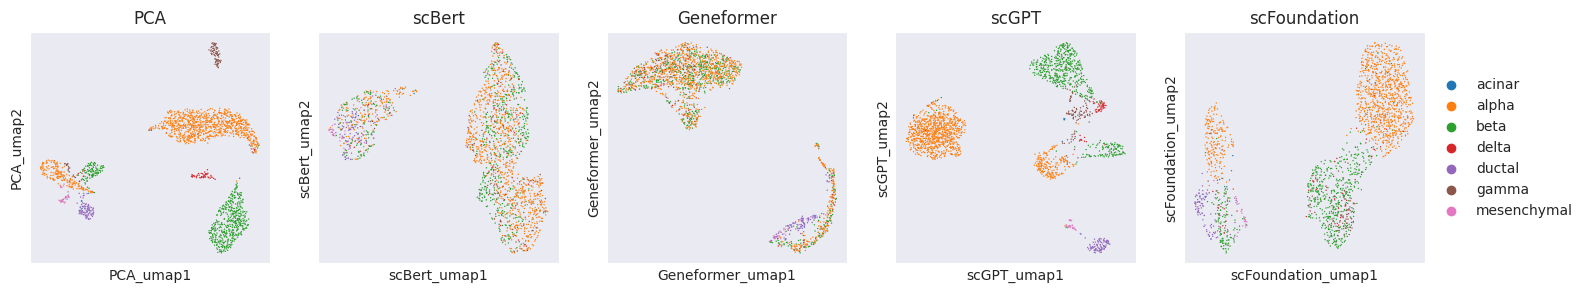

In [11]:
import matplotlib.pyplot as plt


models = ['PCA', 'scBert', 'Geneformer', 'scGPT', 'scFoundation']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3), gridspec_kw={"wspace": 0.2})
label_key = 'celltype' if 'celltype' in adata.obs.columns else 'Celltype'
# adata.obs['batch_str'] = adata.obs['batch'].astype(str)
# label_key = 'batch_str'
axes = [ax1, ax2, ax3, ax4, ax5]  # Collect all axes in a list
for j in range(5):
    ax = axes[j]  # Access the correct ax from the axes list
    if j < 4:
        sc.pl.embedding(adata, basis=models[j]+"_umap", color = label_key, ax=ax, show=False, title=models[j], legend_loc="none", size=4)
    else:
        sc.pl.embedding(adata, basis=models[j]+"_umap", color = label_key, ax=ax, show=False, title=models[j], size=4)
# Display the plot
# plt.savefig(f"./fig4_anno_cell_emb_celltype.pdf", bbox_inches='tight')
plt.show()

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/share/huadjyin/home/s_qiup

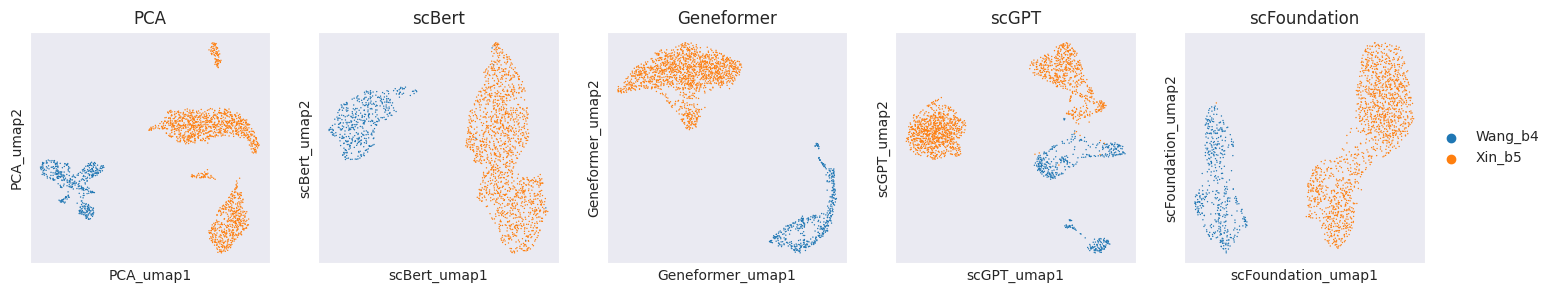

In [13]:
import matplotlib.pyplot as plt


models = ['PCA', 'scBert', 'Geneformer', 'scGPT', 'scFoundation']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(18, 3), gridspec_kw={"wspace": 0.2})
label_key = 'batchlb'
# adata.obs['batch_str'] = adata.obs['batch'].astype(str)
# label_key = 'batch_str'
axes = [ax1, ax2, ax3, ax4, ax5]  # Collect all axes in a list
for j in range(5):
    ax = axes[j]  # Access the correct ax from the axes list
    if j < 4:
        sc.pl.embedding(adata, basis=models[j]+"_umap", color = label_key, ax=ax, show=False, title=models[j], legend_loc="none", size=4)
    else:
        sc.pl.embedding(adata, basis=models[j]+"_umap", color = label_key, ax=ax, show=False, title=models[j], size=4)
# Display the plot
# plt.savefig(f"./fig4_anno_cell_emb_batch.pdf", bbox_inches='tight')
plt.show()

In [19]:
adata

AnnData object with n_obs × n_vars = 1477 × 15558
    obs: 'batch', 'batchlb', 'celltype_orig', 'cellname', 'celltype', 'Celltype'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'celltype_colors', 'batchlb_colors'
    obsm: 'X_pca', 'X_umap', 'PCA_umap', 'scBert', 'scBert_umap', 'Geneformer', 'Geneformer_umap', 'scGPT', 'scGPT_umap', 'scFoundation', 'scFoundation_umap', 'PCA'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:

from scib_metrics.benchmark import Benchmarker



models = ['PCA', 'scBert', 'Geneformer', 'scGPT', 'scFoundation']
output_dir = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/cell_emb/hpancreas/'
pkl_map = {'scBert': 'scbert_cell_emb.pkl', 'scGPT': 'scg_cell_emb.pkl', 'scFoundation': 'scf_cell_emb.pkl', 'Geneformer': 'gf_cell_emb.pkl'}

label_key = 'celltype'

bm = Benchmarker(
adata,
batch_key="batchlb",
label_key=label_key,
embedding_obsm_keys=['X_pca', 'scBert', 'Geneformer', 'scGPT', 'scFoundation'],
n_jobs=6)
bm.benchmark()


Metrics:   0%|          | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]WARNING:jax._src.xla_bridge:An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.

Metrics:  60%|██████    | 6/10 [00:11<00:07,  1.79s/it, Batch correction: kbet_per_label]

INFO     epsilon consists of a single batch or is too small. Skip.                                                 
INFO     macrophage consists of a single batch or is too small. Skip.                                              
INFO     mast consists of a single batch or is too small. Skip.                                                    
INFO     mesenchymal consists of a single batch or is too small. Skip.                                             
INFO     schwann consists of a single batch or is too small. Skip.                                                 
INFO     t_cell consists of a single batch or is too small. Skip.                                                  



Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  60%|██████    | 6/10 [00:05<00:03,  1.16it/s, Batch correction: kbet_per_label]

INFO     epsilon consists of a single batch or is too small. Skip.                                                 
INFO     macrophage consists of a single batch or is too small. Skip.                                              
INFO     mast consists of a single batch or is too small. Skip.                                                    
INFO     mesenchymal consists of a single batch or is too small. Skip.                                             
INFO     schwann consists of a single batch or is too small. Skip.                                                 
INFO     t_cell consists of a single batch or is too small. Skip.                                                  



Metrics:  80%|████████  | 8/10 [00:07<00:01,  1.03it/s, Batch correction: pcr_comparison]    /home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  60%|██████    | 6/10 [00:04<00:02,  1.50it/s, Batch correction: kbet_per_label]

INFO     epsilon consists of a single batch or is too small. Skip.                                                 
INFO     macrophage consists of a single batch or is too small. Skip.                                              
INFO     mast consists of a single batch or is too small. Skip.                                                    
INFO     mesenchymal consists of a single batch or is too small. Skip.                                             
INFO     schwann consists of a single batch or is too small. Skip.                                                 
INFO     t_cell consists of a single batch or is too small. Skip.                                                  



Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  60%|██████    | 6/10 [00:05<00:03,  1.20it/s, Batch correction: kbet_per_label]

INFO     epsilon consists of a single batch or is too small. Skip.                                                 
INFO     macrophage consists of a single batch or is too small. Skip.                                              
INFO     mast consists of a single batch or is too small. Skip.                                                    
INFO     mesenchymal consists of a single batch or is too small. Skip.                                             
INFO     schwann consists of a single batch or is too small. Skip.                                                 
INFO     t_cell consists of a single batch or is too small. Skip.                                                  



Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                         
Metrics:  60%|██████    | 6/10 [00:06<00:04,  1.03s/it, Batch correction: kbet_per_label]

INFO     epsilon consists of a single batch or is too small. Skip.                                                 
INFO     macrophage consists of a single batch or is too small. Skip.                                              
INFO     mast consists of a single batch or is too small. Skip.                                                    
INFO     mesenchymal consists of a single batch or is too small. Skip.                                             
INFO     schwann consists of a single batch or is too small. Skip.                                                 
INFO     t_cell consists of a single batch or is too small. Skip.                                                  



Embeddings: 100%|██████████| 5/5 [00:50<00:00, 10.12s/it]atch correction: pcr_comparison]

                                                                                         

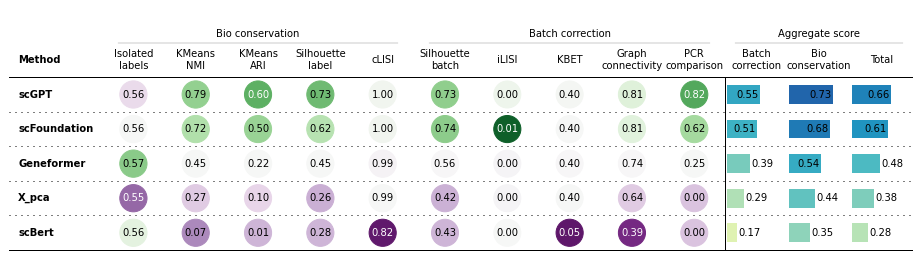

In [21]:
bm.plot_results_table(min_max_scale=False, save_dir='./')

In [140]:

import scanpy as sc
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
organs = "hpancreas"
organs = "zheng68k"
result = []
model_name = []
for i in organs.split(','):
    # for model in {'scbert': 'scBert', 'scgpt': 'scGPT', 'geneformer':'Geneformer'}:
    adata = sc.read_h5ad(f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/annotation/human/organs/{i}/test.h5ad')
    labels = adata.obs['celltype'].values if i == 'zheng68k' else adata.obs['Celltype'].values
    label_dict = np.unique(labels)
    label_map = {label_dict[i] for i in range(len(label_dict))}
    print(label_dict)
    for model in {'scgpt': 'scGPT', 'geneformer':'Geneformer', 'scbert': 'scBert', 'scf': 'Scfoundation'}:
        model_name.append({'scbert': 'scBert', 'scgpt': 'scGPT', 'geneformer':'Geneformer', 'scf': 'Scfoundation'}[model])
        path = f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/{i}/' if model != 'scf' else f'/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/result/anno/{model}/hvg/{i}/'
        predict_label = pickle.load(open(path + 'predict_list.pk', 'rb'))
        m = confusion_matrix(labels, predict_label, labels=label_dict)
        print(m)
        score = np.around(m/np.sum(m, axis=1)[:, None], decimals=2)
        # score[np.isnan] = 0
        df = pd.DataFrame(score, index=label_dict, columns=label_dict[::-1])
        result.append(df)

['CD14+ Monocyte' 'CD19+ B' 'CD34+' 'CD4+ T Helper2' 'CD4+/CD25 T Reg'
 'CD4+/CD45RA+/CD25- Naive T' 'CD4+/CD45RO+ Memory' 'CD56+ NK'
 'CD8+ Cytotoxic T' 'CD8+/CD45RA+ Naive Cytotoxic' 'Dendritic']
[[ 166    0    0    1    0    0    0    0    1    0   24]
 [   0  456    1    0   15    8    3    0    6   37    3]
 [   0    1   17    0    0    0    0    0    0    0    1]
 [   1    1    0    4    0    1    1    0    1    0    0]
 [   0    2    0    2  421   36   58    0   21   16    1]
 [   0    1    0    1   13  159    6    0   12   23    0]
 [   1    0    1    1   54   11  212    0   21    2    0]
 [   0    0    0    0    0    0    0  793   34    0    0]
 [   0    4    0    0   57   25   51   57 1806   87    0]
 [   0    4    0    0   35   56   11    0   79 1487    2]
 [  40    3    0    2    0    1    0    1    0    1  135]]
[[ 158    0    0    0    0    0    0    1    0    0   33]
 [   0  479    0    0   10    2    0    0    6   30    2]
 [   0    1   16    0    0    1    0    0    0 

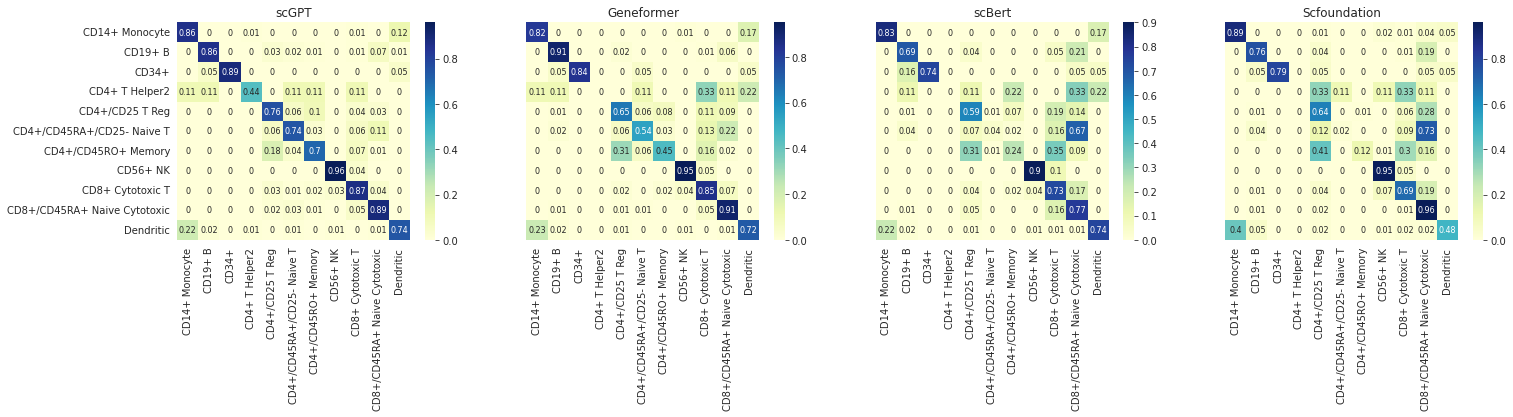

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns


models = ['scBert', 'Geneformer', 'scGPT', 'scFoundation']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 4), gridspec_kw={"wspace": 0.2})
# adata.obs['batch_str'] = adata.obs['batch'].astype(str)
# label_key = 'batch_str'
axes = [ax1, ax2, ax3, ax4]  # Collect all axes in a list
for j in range(4):
    ax = axes[j]  # Access the correct ax from the axes list
    res = result[j]
    title = model_name[j]
    cbar = False if j < 3 else True
    g = sns.heatmap(res,annot=True,ax=ax, fmt='g', cmap='YlGnBu', cbar=True, annot_kws={'fontsize': 8})
    if j > 0:
        g.set(yticklabels=[])  
        ax.xaxis.set_ticklabels(label_dict)
    else:
        ax.xaxis.set_ticklabels(label_dict)
        ax.yaxis.set_ticklabels(label_dict)
    # plt.xticks(rotation=30)
    # g.set(title=models[j])
    # g.set(xlabel=None)
    # g.set(ylabel=None)
    # g.tick_params(bottom=False)
    # sns.heatmap(res,annot=True,ax=ax, fmt='g', cmap='YlGnBu', cbar=True, annot_kws={'fontsize': 8}, xticklabels=False, yticklabels=False)
    # ax.set_ylim()
    # ax.set_xlabel('Predicted labels')
    # ax.set_ylabel('True labels')
    ax.set_title(title)

    

# labels, title and ticks

# Display the plot
plt.savefig(f"./fig6_anno_confusion_matrix_zheng68k.pdf", bbox_inches='tight')
plt.show()